In [1]:
import torch
from torchzero.optim.first_order.gradient_direction_curvature import QuadraticGDC
from torchzero.optim.first_order.gd import GD
from image_descent import ImageDescent, FunctionDescent2D, surfaces
from glio.plot import *

image = r"F:\Stuff\Programming\AI\pytorch image descent\surfaces\spiral.jpg"

In [2]:
y = torch.nn.Parameter(torch.tensor(3.))

opt = QuadraticGDC([y], 0.1)
def closure(backward:bool):
    loss = (y**2) + 10
    if backward: loss.backward()
    return loss
opt.step(closure) # type:ignore # pylint:disable=W0106
print(y)

Parameter containing:
tensor(0.0265, requires_grad=True)


tensor(0.7761)
tensor(0.0003)
tensor(5.8695e-06)
{0: {'y': 0.782012939453125, 'y_epsilon': 0.7819532752037048, 'y_step': 0.77605801820755, 'minimum_x_dist': 25.673816026358445, 'step_to_minimum': 25.673816026358445}, 1: {'y': 0.0003325517463963479, 'y_epsilon': 0.0003325263678561896, 'y_step': 0.0003300194221083075, 'minimum_x_dist': 22.718394690494506, 'step_to_minimum': 22.718394690494506}, 2: {'y': 5.914576831855811e-06, 'y_epsilon': 5.914125722483732e-06, 'y_step': 5.869537744729314e-06, 'minimum_x_dist': 31.078980914066232, 'step_to_minimum': 31.078980914066232}}


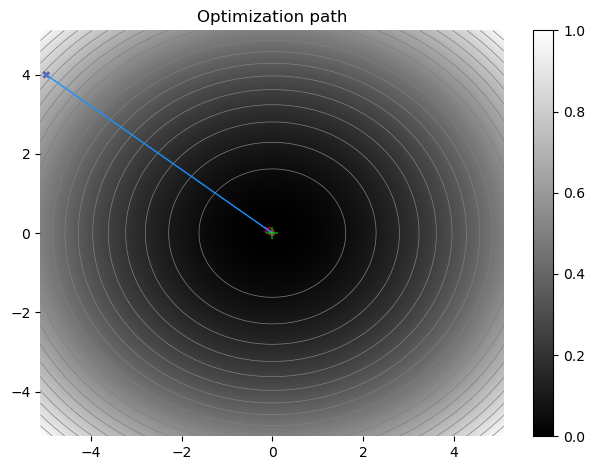

In [18]:
descent = FunctionDescent2D(surfaces.sphere)
optimizer = QuadraticGDC(descent.parameters(), lr = 0.1, max_dist=10000, discard_over=100000, debug=True)
for i in range(3):
    def closure(backward:bool):
        loss = descent.step()
        if backward: 
            optimizer.zero_grad()
            loss.backward()
        return loss
    loss = optimizer.step(closure)
    print(loss)
print(optimizer.log)
descent.plot_path()

tensor(0.6639)
tensor(6.0922e-05)
tensor(5.2733e-09)


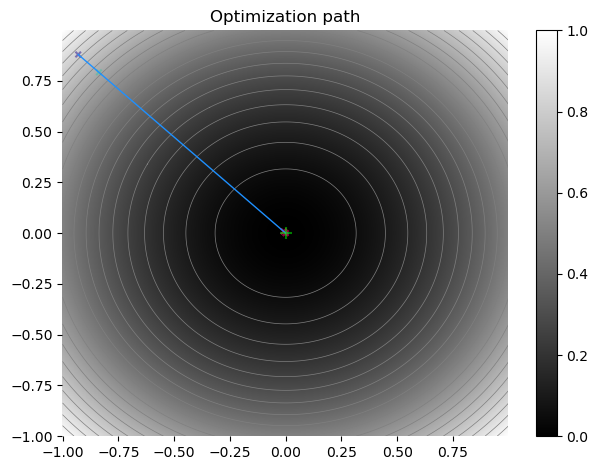

In [4]:
descent = FunctionDescent2D(surfaces.convex)
optimizer = QuadraticGDC(descent.parameters(), lr = 0.1)
for i in range(3):
    def closure(backward:bool):
        loss = descent.step()
        if backward: 
            optimizer.zero_grad()
            loss.backward()
        return loss
    loss = optimizer.step(closure)
    print(loss)
descent.plot_path()

tensor(0.6321)
tensor(0.1516)
tensor(0.0348)
tensor(0.0064)
tensor(0.0008)
tensor(0.0008)
tensor(0.0008)
tensor(0.0008)
tensor(0.0008)
tensor(0.0008)


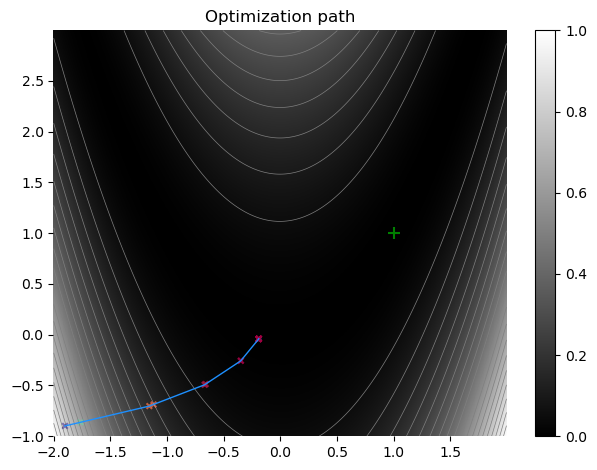

In [5]:
descent = FunctionDescent2D(surfaces.rosenbrock)
optimizer = QuadraticGDC(descent.parameters(), lr = 0.1)
for i in range(10):
    def closure(backward:bool):
        loss = descent.step()
        if backward: 
            optimizer.zero_grad()
            loss.backward()
        return loss
    loss = optimizer.step(closure)
    print(loss)
descent.plot_path()

tensor(0.4592)


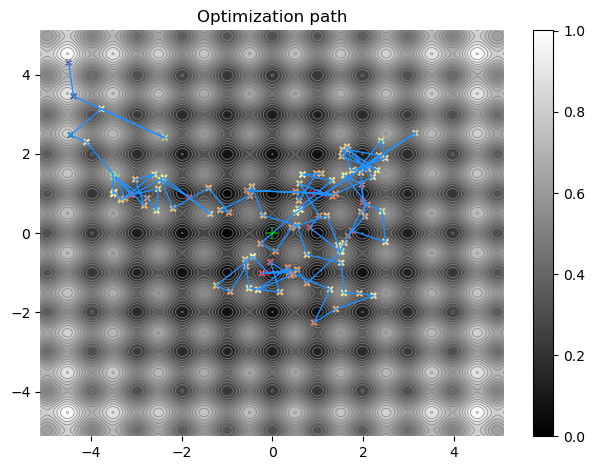

In [23]:
descent = FunctionDescent2D(surfaces.rastrigin)
optimizer = QuadraticGDC(descent.parameters(), lr = 1, validate_step=True, max_dist=10000, discard_over=100000, )
for i in range(100):
    def closure(backward:bool):
        loss = descent.step()
        if backward: 
            optimizer.zero_grad()
            loss.backward()
        return loss
    loss = optimizer.step(closure)
print(loss)
descent.plot_path()

tensor(0.9190)


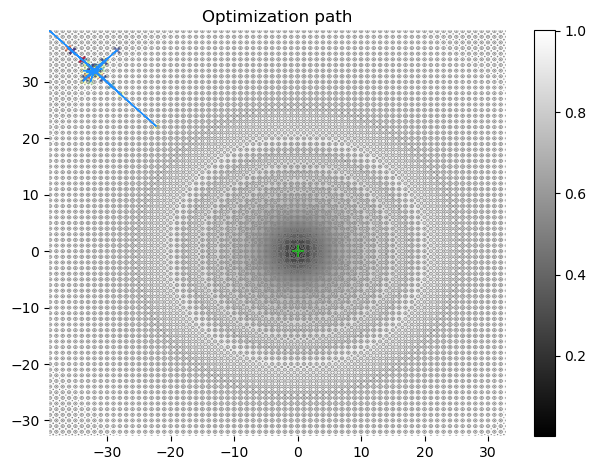

In [25]:
descent = FunctionDescent2D(surfaces.ackley)
optimizer = QuadraticGDC(descent.parameters(), lr = 2, validate_step=True, max_dist=10000, discard_over=100000, )
for i in range(1000):
    def closure(backward:bool):
        loss = descent.step()
        if backward: 
            optimizer.zero_grad()
            loss.backward()
        return loss
    loss = optimizer.step(closure)
print(loss)
descent.plot_path()

tensor(5.3235e-06)


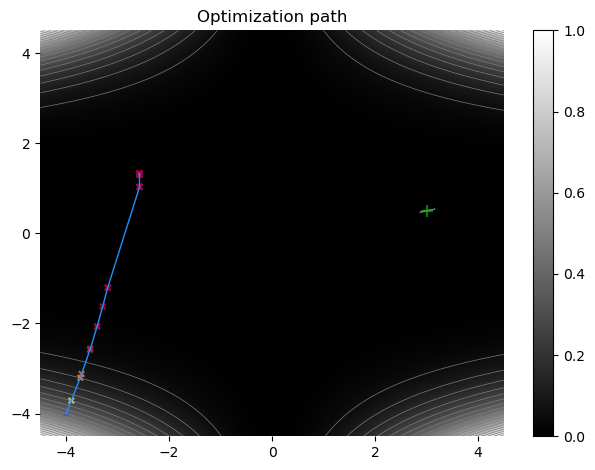

In [30]:
descent = FunctionDescent2D(surfaces.beale)
optimizer = QuadraticGDC(descent.parameters(), lr = 5e-1, max_dist=10000, discard_over=10000)
for i in range(100):
    def closure(backward:bool):
        loss = descent.step()
        if backward: 
            optimizer.zero_grad()
            loss.backward()
        return loss
    loss = optimizer.step(closure)
print(loss)
descent.plot_path()

tensor(0.2353)
tensor(0.0150)
tensor(0.0001)


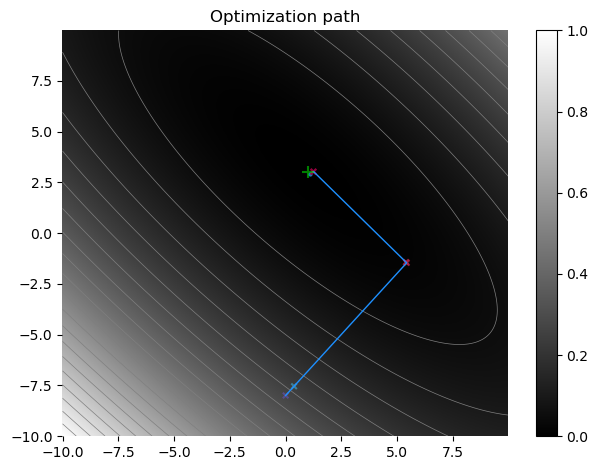

In [8]:
descent = FunctionDescent2D(surfaces.booth)
optimizer = QuadraticGDC(descent.parameters(), lr = 10, max_dist=10000, discard_over=10000)
for i in range(3):
    def closure(backward:bool):
        loss = descent.step()
        if backward: 
            optimizer.zero_grad()
            loss.backward()
        return loss
    loss = optimizer.step(closure)
    print(loss)
descent.plot_path()

tensor(0.2353)
tensor(0.0297)
tensor(0.0137)
tensor(0.0082)
tensor(0.0055)
tensor(0.0029)
tensor(0.0019)
tensor(0.0005)
tensor(0.0003)
tensor(7.4561e-05)


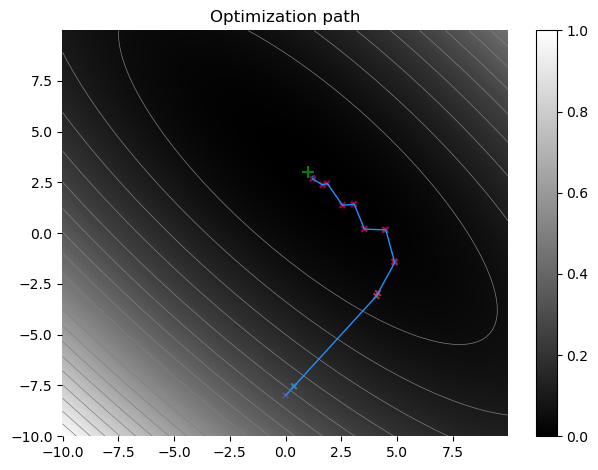

In [9]:
descent = FunctionDescent2D(surfaces.booth)
optimizer = QuadraticGDC(descent.parameters(), lr = 10, max_dist=10000, discard_over=10000, distance_mul=0.75)
for i in range(10):
    def closure(backward:bool):
        loss = descent.step()
        if backward: 
            optimizer.zero_grad()
            loss.backward()
        return loss
    loss = optimizer.step(closure)
    print(loss)
descent.plot_path()

tensor(5.1151e-06)


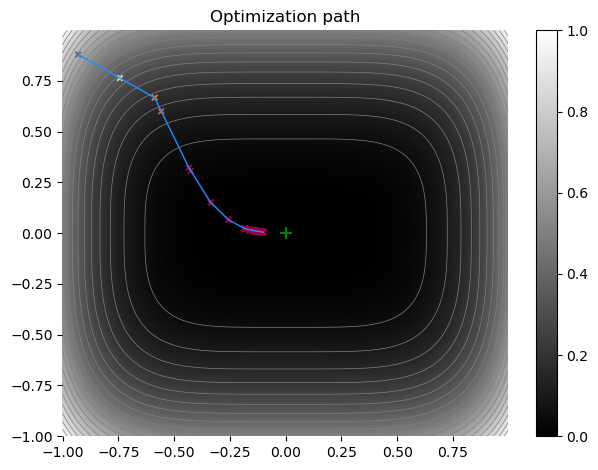

In [11]:
descent = FunctionDescent2D(surfaces.PowSum(5,3))
optimizer = QuadraticGDC(descent.parameters(), lr = 0.1, lr_mul=0.001)
for i in range(100):
    def closure(backward:bool):
        loss = descent.step()
        if backward: 
            optimizer.zero_grad()
            loss.backward()
        return loss
    loss = optimizer.step(closure)
print(loss)
descent.plot_path()

tensor(0.4708)


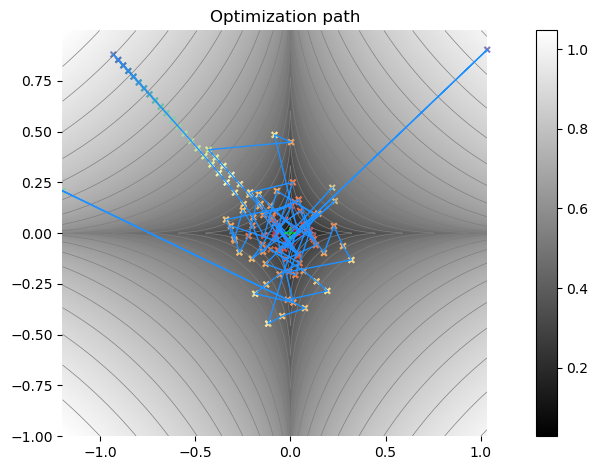

In [31]:
descent = FunctionDescent2D(surfaces.cross)
optimizer = QuadraticGDC(descent.parameters(), lr = 0.1, lr_mul=0.001, validate_step=True, max_dist=10000, discard_over=100000, )
for i in range(100):
    def closure(backward:bool):
        loss = descent.step()
        if backward: 
            optimizer.zero_grad()
            loss.backward()
        return loss
    loss = optimizer.step(closure)
print(loss)
descent.plot_path()